# 고객 데이터 분석
### 데이터 출처 : UCI Machine Learning Repository

[링크주소 및 다운로드]https://archive.ics.uci.edu/ml/datasets/bank+marketing
<br>

#### Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22-31

# <데이터 소개>
- 해외의 은행이 진행한 마케팅 데이터
- 아웃바운드 텔레마케팅으로 마케팅 캠페인을 진행

# bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). <br>
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

# Output variable:
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>



In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [2]:
import pandas as pd
from pandas import Series
from pandas import DataFrame

In [3]:
import matplotlib.pyplot as plt

# 데이터불러오기
 파일명 : bank-additional-full.csv

In [5]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/bank-additional-full.csv')

In [6]:
#head()
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


- 엑셀로 데이터를 열었을 때의 화면
- 콜론으로 구분된 데이터<br>


In [7]:
#window
#sep = ';'
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/bank-additional-full.csv',
                 engine='python',sep=';')

## # 데이터탐색

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 결측치 확인

In [10]:
# 결측치 확인
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# 결측치 확인 - 열단위
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df.shape

(41188, 21)

In [13]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
#education
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [17]:
#value_counts() - 열의 고유값 빈도
#education
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [19]:
#unique() - 열의 고유값
#marital
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [20]:
#value_counts() - 열의 고유값 빈도
#marital
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

# 데이터 시각화

In [21]:
df['age']

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

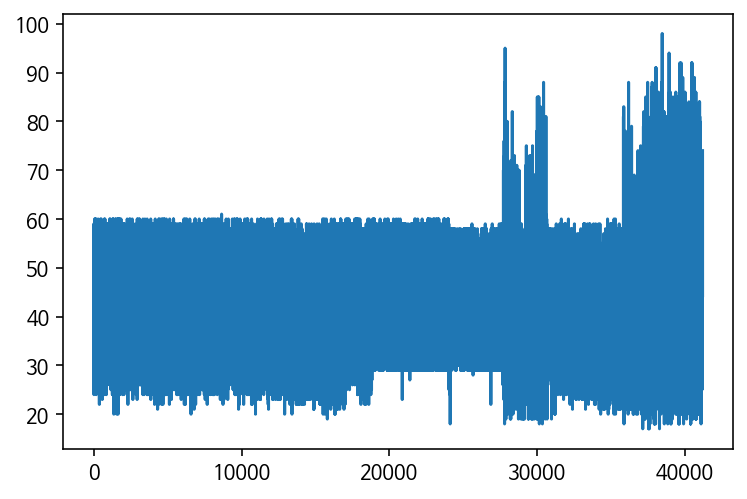

In [22]:
df['age'].plot()
plt.show()
#x축이 인덱스 순서

- age 칼럼 선그래프 그리기(오름차순)
 1. 노출수칼럼을 수치 순서대로 오름차순 정렬
 2. 정렬된 데이터(시리즈)의 형태대로 인덱스 재생성 

In [23]:
#오름차순 정렬
#age칼럼 
age=df['age'].sort_values()

In [24]:
#age변수출력
age

38274    17
37579    17
37539    17
37140    17
37558    17
         ..
40450    92
38921    94
27826    95
38455    98
38452    98
Name: age, Length: 41188, dtype: int64

In [26]:
#reset_index - 인덱스 재생성, 기존 인덱스를 데이터프레임의 열로 반환
age = age.reset_index()

In [27]:
#age 변수출력
age

,index,age
0,38274,17
1,37579,17
2,37539,17
3,37140,17
4,37558,17
...,...,...
41183,40450,92
41184,38921,94
41185,27826,95
41186,38455,98


In [29]:
#drop(axis=1) - 삭제(열 기준)
age = age.drop('index',axis=1)

In [30]:
#age 변수출력
age

,age
0,17
1,17
2,17
3,17
4,17
...,...
41183,92
41184,94
41185,95
41186,98


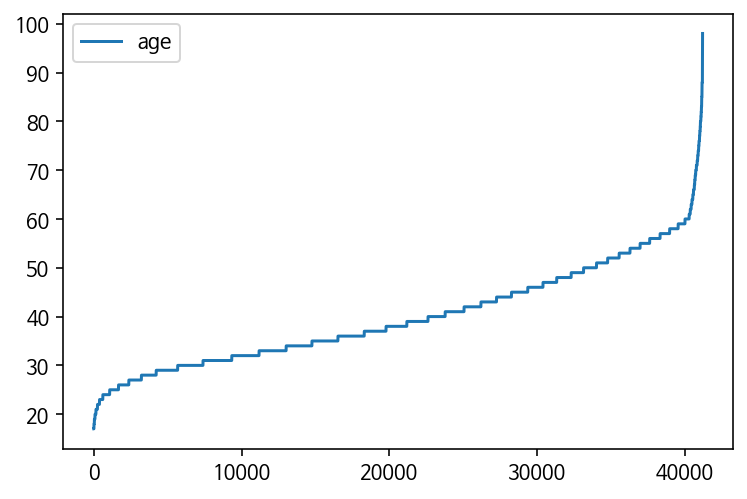

In [32]:
#plotting
#값의 오름차순별로 정렬한 그래프
#보통 '나이'를 20대,30대,40..대로 나누어 데이터를 확인함
age.plot()
plt.show()

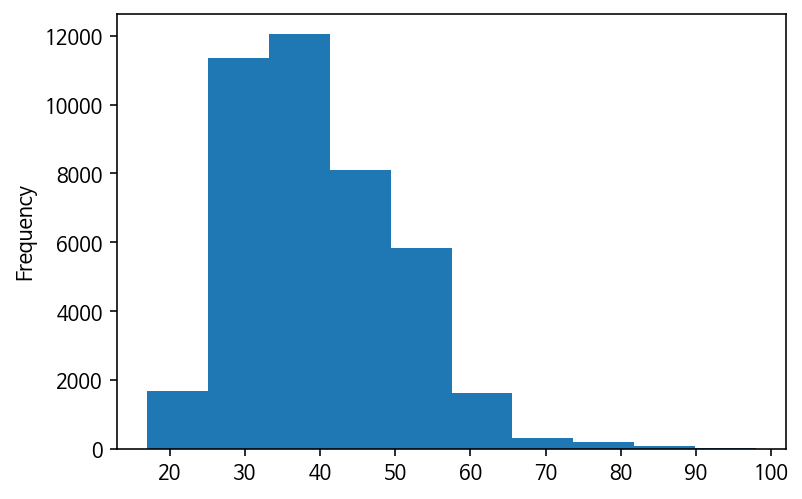

In [33]:
#계급간 빈도를 나타내주는 히스토그램
df['age'].plot.hist()
plt.show()

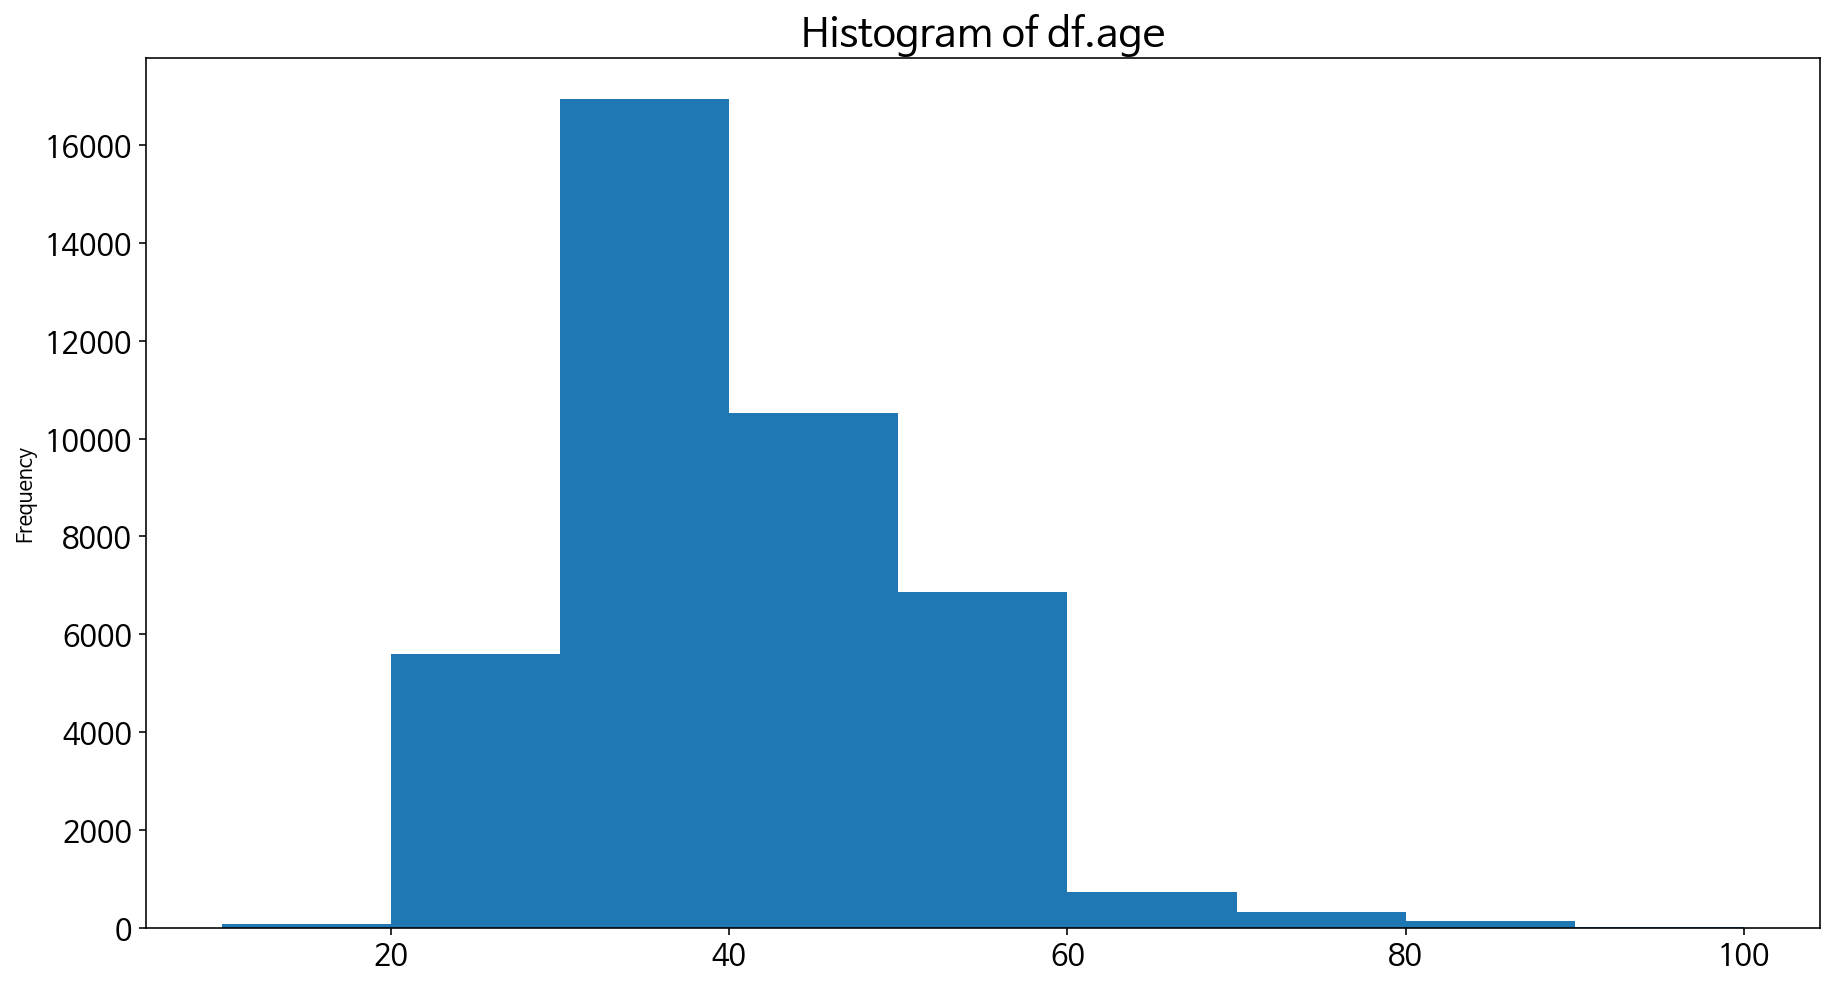

In [34]:
#히스토그램
#bins - 계급구간(10,20,30...100)
#figsize=[15,8]
#xticks(fontsize=15)
#yticks(fontsize=15)
#plt.title('Histogram of df.age',fontsize=20)

df['age'].plot.hist(bins=range(10,101,10),figsize=[15,8])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of df.age',fontsize=20)
plt.show()

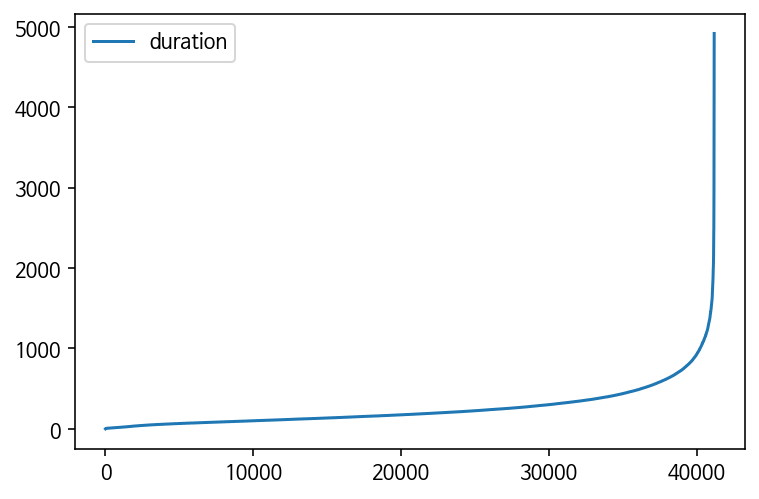

In [35]:
#시각화 예제2 : duration(전화통화시간) 선 그래프 시각화
(((df['duration'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()
#1. 선그래프로 데이터의 패턴 분석
#2. 히스토그램으로 전화통화 시간별 빈도 분석

In [36]:
#히스토그램의 계급구간을 설정하기 위한 최소값, 최대값 파악
#describe()
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

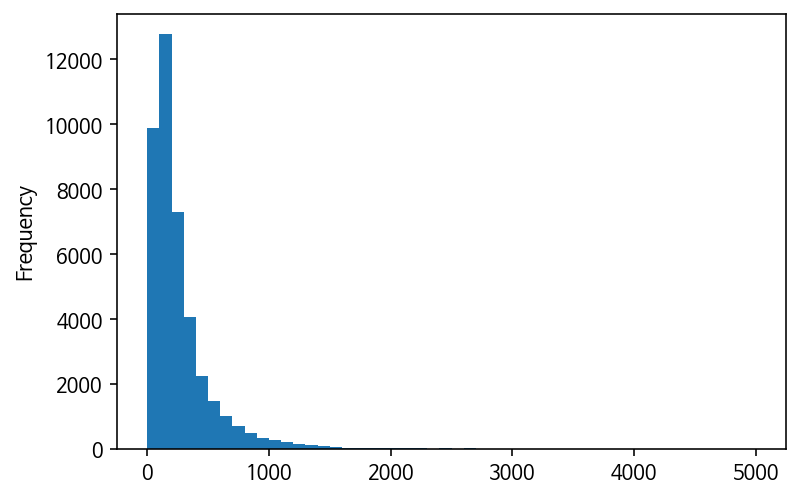

In [38]:
#bins=range(0,5000,100)
df['duration'].plot.hist(bins=range(0,5001,100))
plt.show()

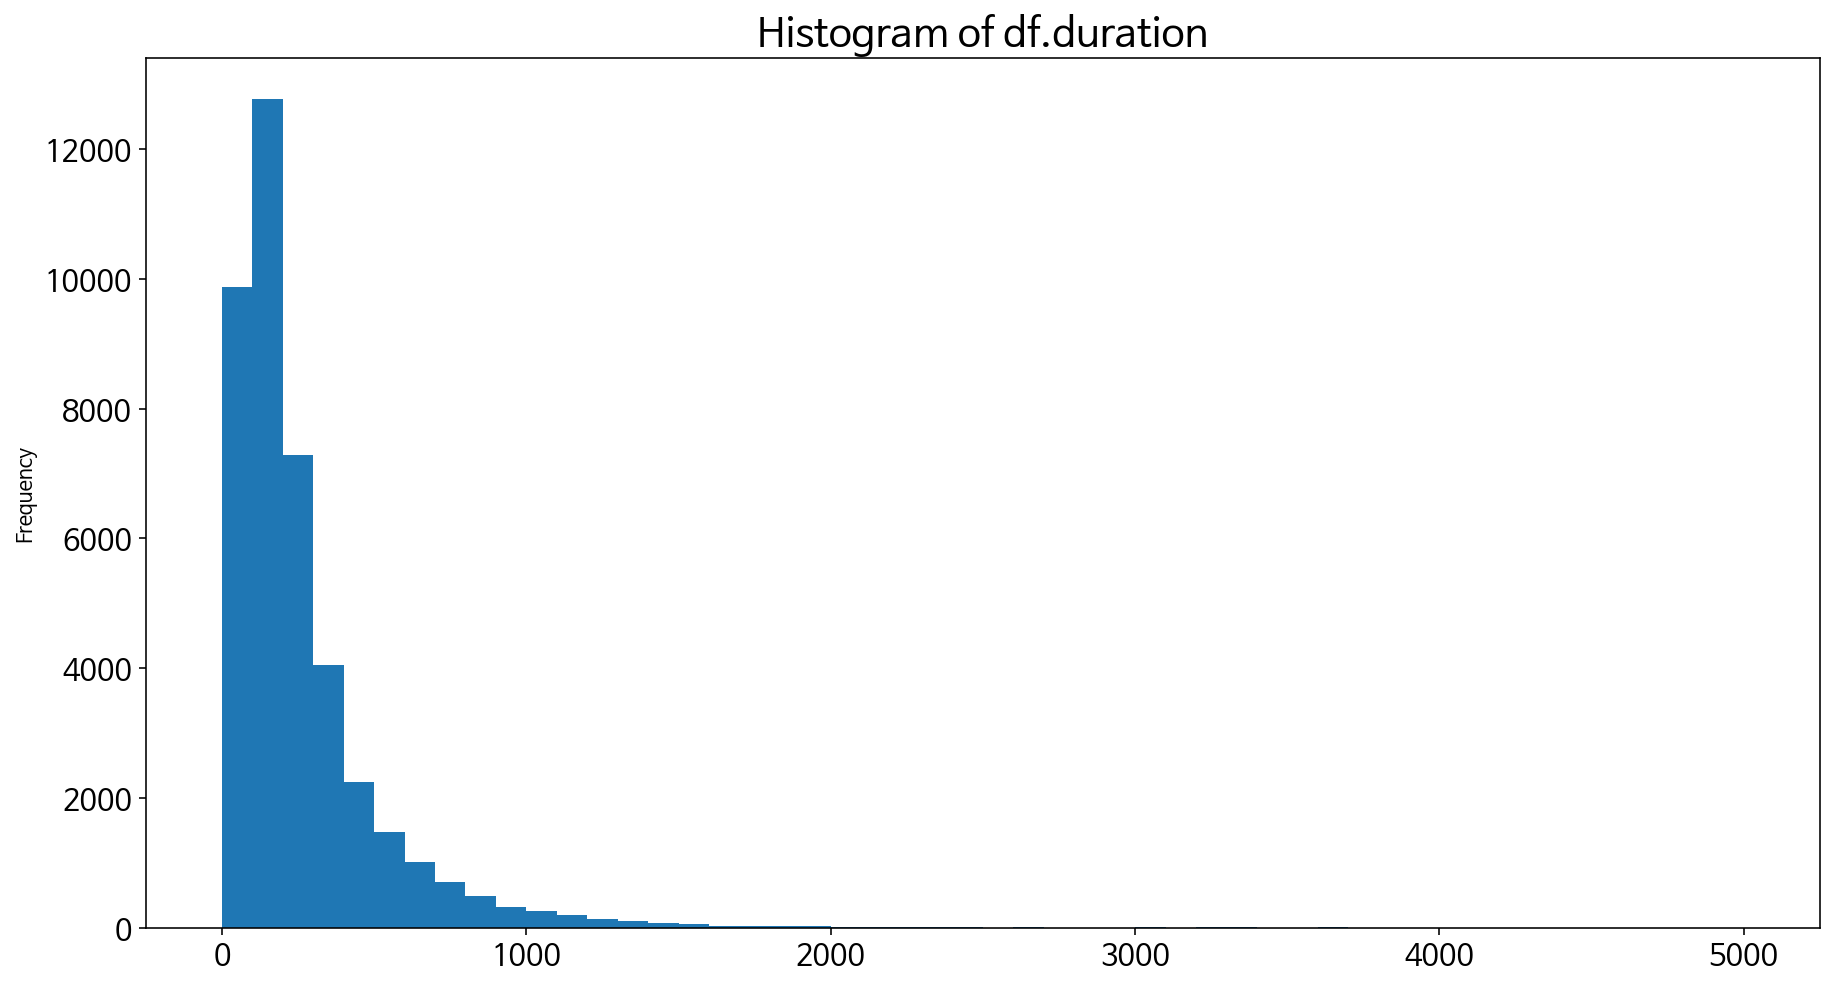

In [39]:
#히스토그램
#bins - 계급구간(0,100,200...5000)
#figsize=[15,8]
#xticks(fontsize=15)
#yticks(fontsize=15)
#plt.title('Histogram of df.duration',fontsize=20)

df['duration'].plot.hist(bins=range(0,5001,100), figsize=[15,8])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of df.duration',fontsize=20)
plt.show()

# 막대그래프, 가로막대그래프

In [ ]:
#선그래프
#marital
df['marital'].plot()
plt.show()
#no numeric data to plot

In [ ]:
#히스토그램
df['marital'].plot.hist()
#no numeric data to plot

In [41]:
#unique()함수를 사용한 age칼럼 고유값 확인 
df['age'].unique()
#선그래프를 그린 age칼럼 데이터는 수치데이터

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [42]:
#unique()함수를 사용한 marital칼럼 고유값 확인 
df['marital'].unique()
#marital칼럼의 데이터는 문자

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

- 막대그래프를 통한 시각화
 1. value_counts
 2. 막대그래프 시각화

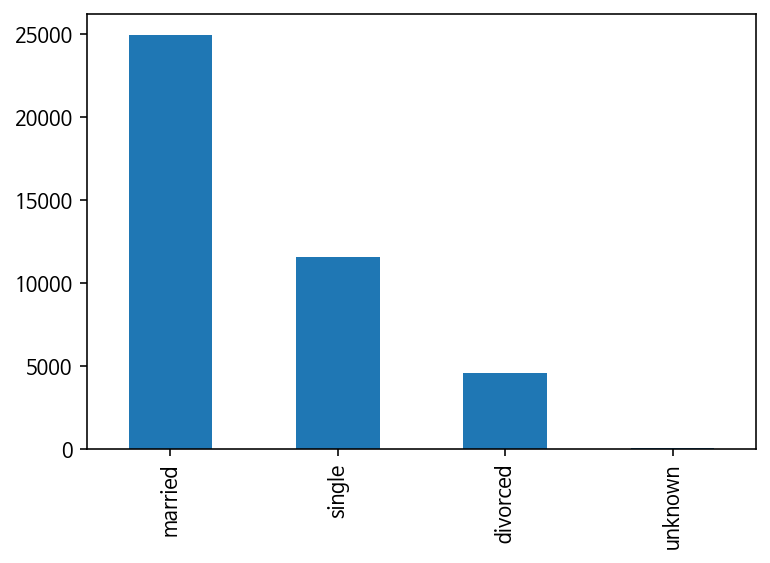

In [44]:
#1. value_counts()
#marital
marital = df['marital'].value_counts()
marital.plot.bar()
plt.show()

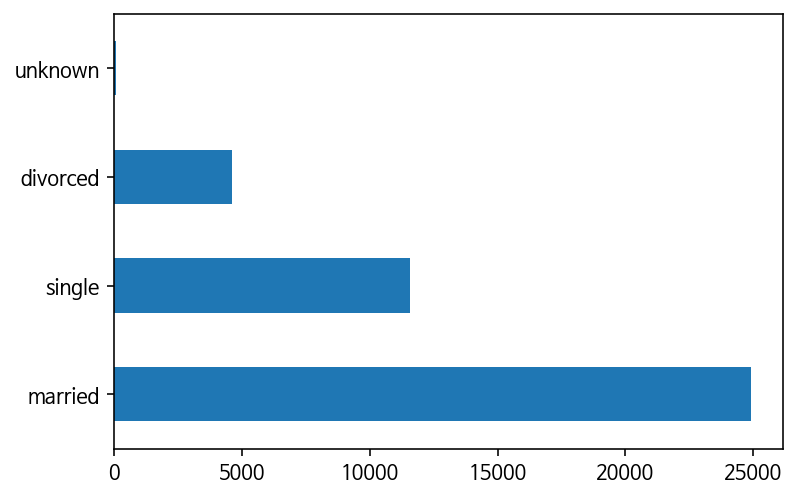

In [45]:

marital.plot.barh()
plt.show()

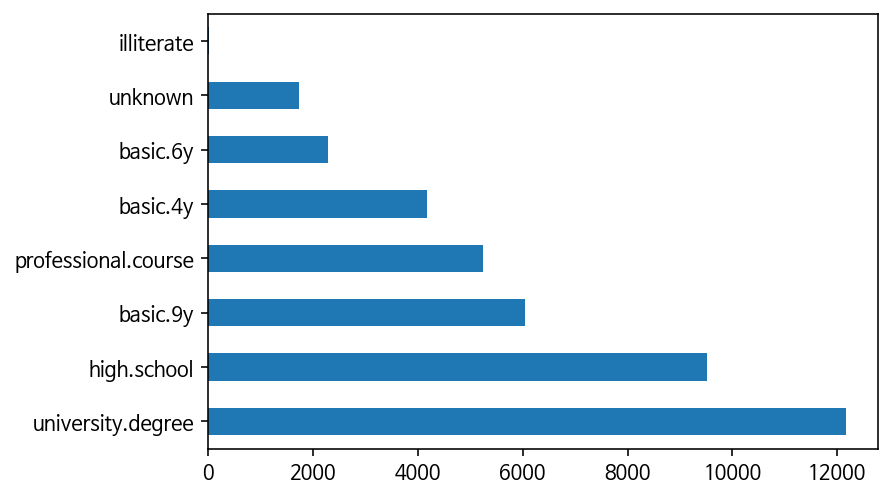

In [47]:
#education 가로막대그래프 한줄 코드
#value_counts(),plot.barh()
education = df['education'].value_counts()
education.plot.barh()
plt.show()

# 데이터 분석

# 분석주제 1 :
### 대출이 있는 사람이라면 은행 상품에 잘 가입하지 않을 것이다.

- 학습목표 : 
 1. 가설검증과정 코딩 실습하기
 2. groupby활용한 실습 진행하기

- 분석을 위한 코딩과정
 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
 2. 나뉜 데이터를 대출여부에 따라 나눈다.
 3. 가입한 그룹 중 대출이 있는 사람의 비중과, 가입하지 않은 그룹 중 대출이 있는 사람의 비중을 비교한다.
 
 <br><br>


In [48]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#가입여부에 대한 칼럼 : 'y'
#unique()
df['y'].unique()
#groupby사용 - yes, no그룹으로 나뉘게 됨

array(['no', 'yes'], dtype=object)

In [49]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#groupby('y')
grouped = df.groupby('y')


In [50]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#get_group('yes') - y칼럼이 'yes'인 데이터프레임 추출 - 가입한 그룹만 추출
#get_group('no') - y칼럼이 'no'인 데이터프레임 추출 - 가입하지 않은 그룹만 추출
yes_group = grouped.get_group('yes')
no_group = grouped.get_group('no')

In [51]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#yes_group 출력
yes_group

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [52]:
# 1-3. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#no_group 출력
no_group

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [53]:
#2. 나뉜 데이터(yes_group,no_group)를 대출여부(loan)에 따라 나눈다.
#value_counts
yes = yes_group['loan'].value_counts()

In [54]:
#yes변수 출력
yes
#yes_group의 대출여부 빈도 출력

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [57]:
#2. 나뉜 데이터(yes_group,no_group)를 대출여부(loan)에 따라 나눈다.
#value_counts
no = no_group['loan'].value_counts()

In [58]:
#no변수 출력
no
#no_group의 대출여부 빈도 출력

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

In [59]:
#3. 가입한 그룹 내 대출이 있는 사람의 비중과, 가입하지 않은 그룹 내 대출이 있는 사람의 비중을 비교한다(yes_group).
#비중 : 시리즈 변수 각각의 value를 시리즈의 총합으로 나눔
#시리즈는 산술연산자(+,-,*,/,%,**,//)와 함께 사용가능
#series/series.sum()
yes = yes/yes.sum()

In [60]:
#yes 출력
yes

no         0.829741
yes        0.147198
unknown    0.023060
Name: loan, dtype: float64

In [61]:
#3. 가입한 그룹 내 대출이 있는 사람의 비중과, 가입하지 않은 그룹 내 대출이 있는 사람의 비중을 비교한다(no_group).
no = no/no.sum()

In [62]:
#no 출력
no

no         0.823574
yes        0.152266
unknown    0.024160
Name: loan, dtype: float64

In [63]:
#3. 가입한 그룹 중 대출이 있는 사람의 비중과, 가입하지 않은 그룹 중 대출이 있는 사람의 비중을 비교한다.
#concat : 시리즈 혹은 데이터프레임 결합(default-행방향 결합)
pd.concat([yes,no],axis=1)
#칼럼명이 모두 loan

,loan,loan
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


In [64]:
#series.name : 시리즈의 이름 설정
yes.name = 'y_yes'

In [65]:
#series.name : 시리즈의 이름 설정
no.name = 'y_no'

In [66]:
pd.concat([yes,no],axis=1)
#=> 가입한 그룹의 대출 비중이 가입하지 않은 그룹보다 0.005 더 적다.

,y_yes,y_no
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


# 분석주제 2 :
# 같은 상품을 새로운 고객에게 마케팅 하려고한다. 
# 연령과 상품가입여부, 직업을 함께 고려할때 마케팅 전략을 변화시켜야 할 그룹은?

- 학습목표 : 
 1. 가설검증과정 코딩 실습하기
 2. pivot_table활용한 실습 진행하기

- 분석조건 : 세 개의 칼럼(age, job, y)을 함께 분석해야 함 
- pd.pivot_table('데이터프레임 변수',values=집계 대상 칼럼(수치 데이터), index=행 인덱스가 될 칼럼명, columns=열 인덱스가 될 칼럼명, aggfunc=집계함수-sum,mean,min,max,std,var)

# pivot_table 사용예제

In [67]:
#pd.pivot_table('데이터프레임 변수',values=집계 대상 칼럼, index=행 인덱스가 될 칼럼명, columns=열 인덱스가 될 칼럼명, aggfunc=sum)
pd.pivot_table(df, values='age', index='y', columns = 'job', aggfunc='mean')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [ ]:
#values,index,columns파라미터를 일일이 쓰지 않고 순서대로 입력하여 실행 가능


In [68]:
#멀티 인덱스(multi-index) - 행 인덱스
#['y','marital']
pd.pivot_table(df,'age', ['y','marital'], 'job','mean')

job              admin.  blue-collar  ...  unemployed    unknown
y   marital                           ...                       
no  divorced  43.098432    42.903704  ...   42.140351  43.300000
    married   40.148663    40.857804  ...   41.636861  47.532110
    single    33.858265    33.409255  ...   33.536946  38.288136
    unknown   34.666667    42.818182  ...   47.200000  40.166667
yes divorced  44.878788    42.037736  ...   47.900000  76.333333
    married   41.386503    41.363420  ...   41.941860  58.750000
    single    32.404594    32.652174  ...   32.062500  30.000000
    unknown   42.500000    37.000000  ...         NaN  40.666667

[8 rows x 12 columns]

In [69]:
#멀티 인덱스(multi-index) - 열 인덱스
#['job','contact']
pd.pivot_table(df,'age', ['y','marital'], ['job','contact'],'mean')

job              admin.            blue-collar  ... unemployed    unknown           
contact        cellular  telephone    cellular  ...  telephone   cellular  telephone
y   marital                                     ...                                 
no  divorced  43.143639  43.019185   42.906907  ...  41.978723  46.000000  40.600000
    married   40.349554  39.800357   41.182477  ...  41.871369  48.349057  46.758929
    single    33.515821  34.646707   32.872838  ...  33.940476  39.535714  37.161290
    unknown   35.000000  31.000000   43.800000  ...  50.000000  48.333333  32.000000
yes divorced  45.028302  44.269231   41.500000  ...  40.666667  76.333333        NaN
    married   41.362832  41.540230   41.682432  ...  38.133333  58.181818  60.000000
    single    32.117284  34.150000   31.934426  ...  27.666667  31.000000  28.000000
    unknown   42.500000        NaN   37.000000  ...        NaN  45.000000  32.000000

[8 rows x 24 columns]

In [70]:
#fill-value - 결측치 대체
#fill_value=0
pd.pivot_table(df,'age', ['y','marital'], ['job','contact'],'mean', fill_value=0)

job              admin.            blue-collar  ... unemployed    unknown           
contact        cellular  telephone    cellular  ...  telephone   cellular  telephone
y   marital                                     ...                                 
no  divorced  43.143639  43.019185   42.906907  ...  41.978723  46.000000  40.600000
    married   40.349554  39.800357   41.182477  ...  41.871369  48.349057  46.758929
    single    33.515821  34.646707   32.872838  ...  33.940476  39.535714  37.161290
    unknown   35.000000  31.000000   43.800000  ...  50.000000  48.333333  32.000000
yes divorced  45.028302  44.269231   41.500000  ...  40.666667  76.333333   0.000000
    married   41.362832  41.540230   41.682432  ...  38.133333  58.181818  60.000000
    single    32.117284  34.150000   31.934426  ...  27.666667  31.000000  28.000000
    unknown   42.500000   0.000000   37.000000  ...   0.000000  45.000000  32.000000

[8 rows x 24 columns]

# pivot_table를 사용한 주제2 분석
#### 같은 상품을 새로운 고객에게 마케팅 하려고한다. 
#### 연령과 상품가입여부, 직업을 함께 고려할때 마케팅 전략을 변화시켜야 할 그룹은?


In [71]:
#pivot_table
pivot = pd.pivot_table(df,values='age', index='y', columns='job', aggfunc='mean')

In [ ]:
#pivot 변수 출력
pivot

In [72]:
#yes행과 no행의 차 연산(loc인덱서 사용)
pivot.loc['yes'] - pivot.loc['no']

job
admin.          -0.250911
blue-collar     -0.381430
entrepreneur     0.232030
housemaid        7.945493
management       0.473829
retired          8.327329
self-employed   -2.170175
services        -2.012836
student         -1.596667
technician      -0.853458
unemployed      -0.782328
unknown          1.678627
dtype: float64

In [73]:
#diff행 생성(yes행과 no행의 차)
pivot.loc['diff'] = pivot.loc['yes'] - pivot.loc['no']

In [74]:
#pivot 변수 출력
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054
diff,-0.250911,-0.381430,0.232030,7.945493,0.473829,8.327329,-2.170175,-2.012836,-1.596667,-0.853458,-0.782328,1.678627


In [77]:
#diff 기준으로 내림차순 정렬 
#sort_values() - default : 열 기준 오름차순 정렬
#axis=1,ascending=False : 행 기준 내림차순 정렬
result = pivot.sort_values('diff', axis=1, ascending=False)

In [78]:
#result 출력
result

job,retired,housemaid,unknown,management,entrepreneur,admin.,blue-collar,unemployed,technician,student,services,self-employed
y,,,,,,,,,,,,
no,59.926128,44.705451,45.375427,42.309707,41.703453,38.219846,39.582057,39.844828,38.600033,26.396667,38.090236,40.176887
yes,68.253456,52.650943,47.054054,42.783537,41.935484,37.968935,39.200627,39.062500,37.746575,24.800000,36.077399,38.006711
diff,8.327329,7.945493,1.678627,0.473829,0.232030,-0.250911,-0.381430,-0.782328,-0.853458,-1.596667,-2.012836,-2.170175


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


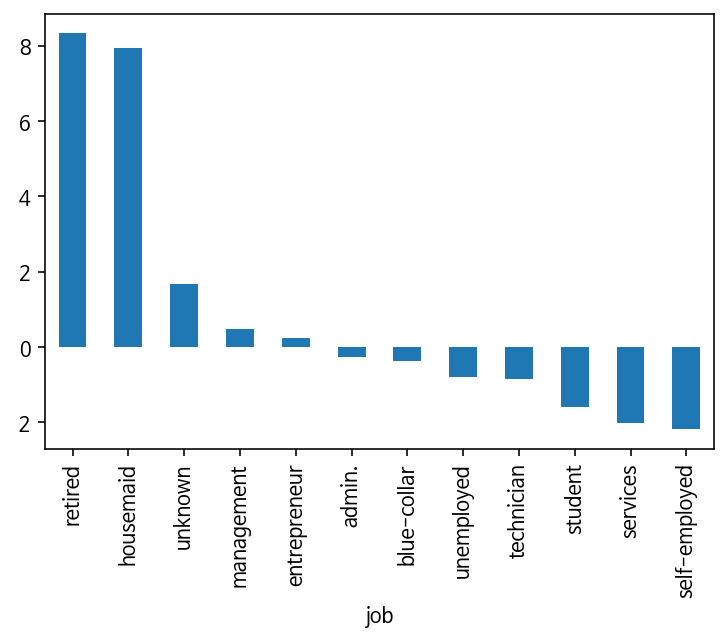

In [79]:
#result의 diff행 막대그래프 시각화
result.loc['diff'].plot.bar()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


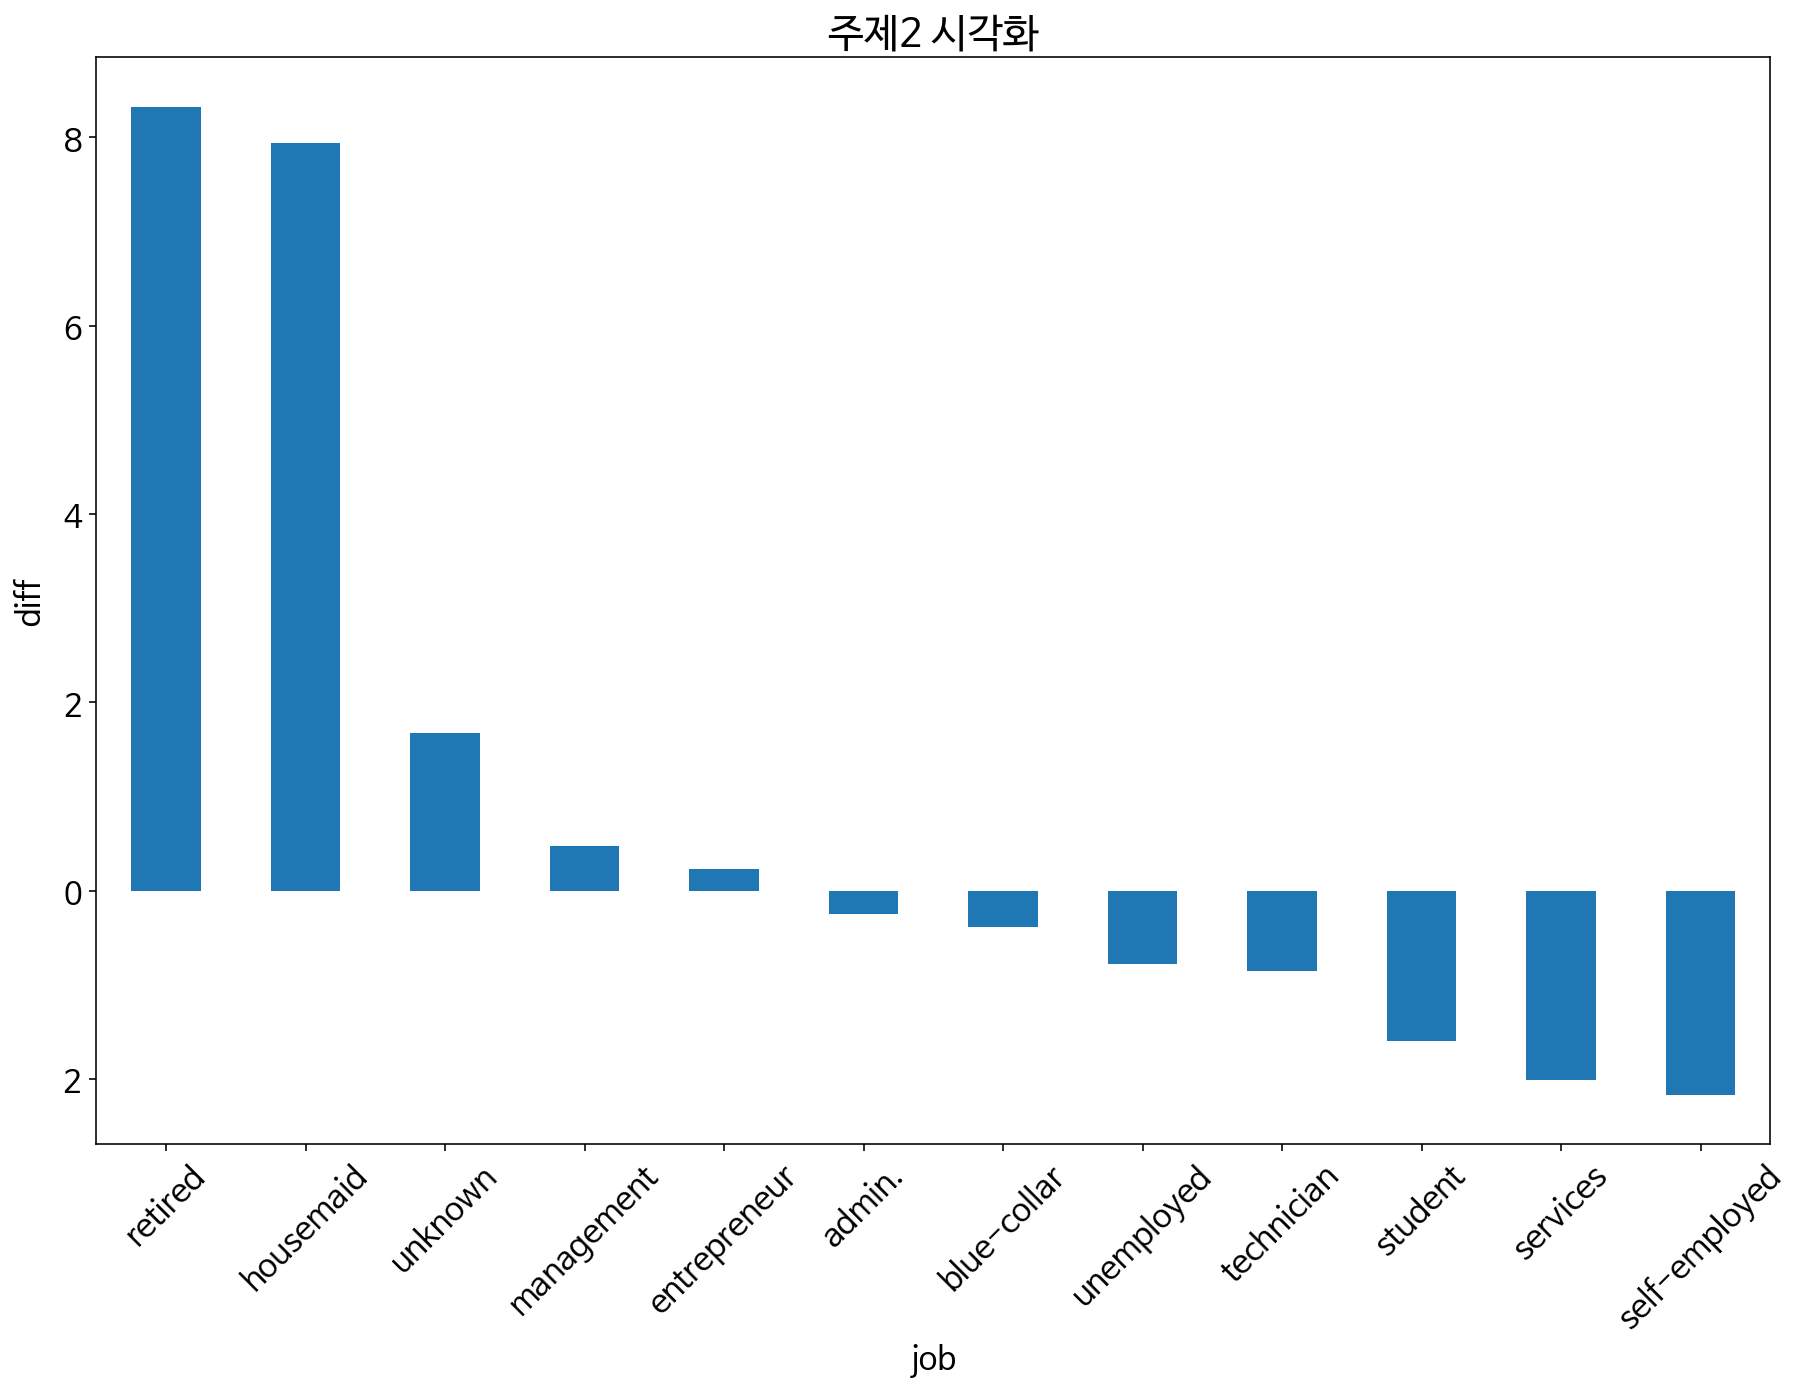

In [80]:
#result의 diff행 막대그래프 시각화
#figsize=[15,10]
#title('주제2 시각화',fontsize=20)
#x축 눈금 - fontsize=16,rotation=45
#y축 눈금 - fontsize=16)
#xlabel - 'job',fontsize=16
#ylabel - 'diff',fontsize=16

result.loc['diff'].plot.bar(figsize=[15,10])
plt.title('주제2 시각화',fontsize=20)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.xlabel('job',fontsize=16)
plt.ylabel('diff',fontsize=16)
plt.show()